## Kreditrisiko - Modellerstellung

#### [Kreditrisiko - Aufgabenstellung](./kreditrisiko_main.ipynb)
#### [Kreditrisiko - Explorative Datenanalyse](./kreditrisiko_eda.ipynb)

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib as jl
import warnings; warnings.filterwarnings('ignore')

In [2]:
df_kredit = pd.read_csv('credit_risk_clean.csv')
df_kredit.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,loan_status
0,-1.810158,-1.368690,0.033433,-0.553549,0
1,-1.810158,-0.600437,0.600566,1.806523,0
2,0.385414,4.435886,1.374229,1.806523,0
3,-0.050558,4.435886,1.059519,1.806523,1
4,-1.798375,-1.112605,-1.277859,1.806523,0


In [5]:
features = df_kredit.drop('loan_status', axis=1)
target = df_kredit.loan_status

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
                                        features, 
                                        target, 
                                        random_state=42)

y_true = y_test

In [11]:
'''
param_lr = {
    'C': np.logspace(-4, 2, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs'],
    'max_iter': [1000]


}

param_svc = {
    'C': np.logspace(-4, 2, 10),
    'gamma': np.logspace(-5, 1, 10),
    'kernel': ['rbf', 'sigmoid'],
    'max_iter': [1000]
}
param_svc={
    'propability' :True
}'''

In [14]:
'''
%%capture
grid_svc = GridSearchCV(
                   SVC(),
                   param_svc,
                   refit=True,
                   verbose=3
)

grid_svc.fit(X_train,y_train)
'''
svc1 = SVC(
                probability=True,
                max_iter=1000
)

svc1.fit(X_train,y_train)



SVC(max_iter=1000, probability=True)


Confusion Matrix for LogisticRegression:


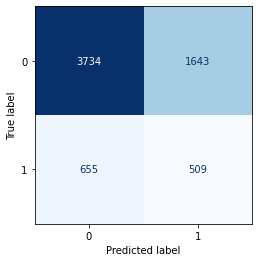

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      5377
           1       0.24      0.44      0.31      1164

    accuracy                           0.65      6541
   macro avg       0.54      0.57      0.54      6541
weighted avg       0.74      0.65      0.68      6541



In [15]:
y_pred_lr = svc1.predict(X_test)
report_lr = classification_report(y_true,y_pred_lr)

print('\nConfusion Matrix for LogisticRegression:')
plot_confusion_matrix(svc1, 
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      colorbar=False)
plt.show()
print(report_lr)

In [31]:
%%capture
grid_lr = GridSearchCV(
                   LogisticRegression(),
                   param_lr,
                   refit=True,
                   verbose=3
)

grid_lr.fit(X_train,y_train)

In [32]:
grid_lr.best_estimator_

LogisticRegression(C=4.641588833612772, max_iter=1000, solver='newton-cg')

In [43]:
grid_svc.best_estimator_

SVC(gamma=0.00021544346900318823, max_iter=1000)

Ich weiss nicht wieso die anderen Parameter hier nicht beruecksichtigt worden sind,
es dauert aber definitiv zu lange um es nochmal laufen zu lassen ...

#### Pipe

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)

### Modell Auswertung

#### LogisticRegession


Confusion Matrix for LogisticRegression:


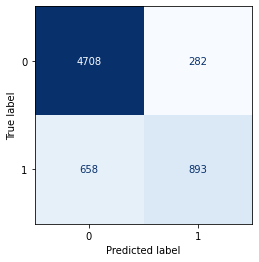

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4990
           1       0.76      0.58      0.66      1551

    accuracy                           0.86      6541
   macro avg       0.82      0.76      0.78      6541
weighted avg       0.85      0.86      0.85      6541



In [34]:
y_pred_lr = grid_lr.predict(X_test)
report_lr = classification_report(y_true,y_pred_lr)

print('\nConfusion Matrix for LogisticRegression:')
plot_confusion_matrix(grid_lr, 
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      colorbar=False)
plt.show()
print(report_lr)

#### SVC


Confusion Matrix for SVC:


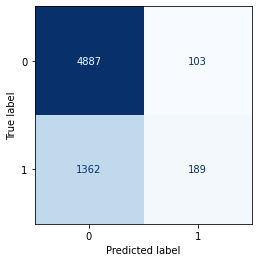

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4990
           1       0.65      0.12      0.21      1551

    accuracy                           0.78      6541
   macro avg       0.71      0.55      0.54      6541
weighted avg       0.75      0.78      0.71      6541



In [46]:
y_pred_svc = grid_svc.predict(X_test)
report_svc = classification_report(y_true,y_pred_svc)

print('\nConfusion Matrix for SVC:')
plot_confusion_matrix(grid_svc, 
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      colorbar=False)
plt.show()
print(report_svc)

### Pipe


Confusion Matrix for Pipe_SVC:


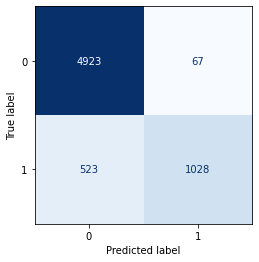

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4990
           1       0.94      0.66      0.78      1551

    accuracy                           0.91      6541
   macro avg       0.92      0.82      0.86      6541
weighted avg       0.91      0.91      0.90      6541




In [13]:
y_pred_pipe = pipe.predict(X_test)
report_pipe = classification_report(y_true,y_pred_pipe)

print('\nConfusion Matrix for Pipe_SVC:')
plot_confusion_matrix(pipe, 
                      X_test,
                      y_test,
                      cmap=plt.cm.Blues,
                      colorbar=False)
plt.show()
print(report_pipe)
print()

#### Modelle speichern

In [47]:
jl.dump(grid_lr, 'Krediteinschaetzung_lr.H5')
jl.dump(grid_svc, 'Krediteinschaetzung_svc.H5')

['Krediteinschaetzung_svc.H5']

In [16]:
jl.dump(pipe, 'Krediteinschaetzung_pipe_svc.H5')

['Krediteinschaetzung_pipe_svc.H5']

In [ ]:
#'TODO: features und target seperat speichern um schnelle Modelleinsetzung zu ermöglichen